In [2]:
%pip install pysal

Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install scipy==1.11.4

Note: you may need to restart the kernel to use updated packages.


In [26]:
%pip install mljar-scikit-plot

  Preparing metadata (setup.py) ... done
  Created wheel for mljar-scikit-plot: filename=mljar_scikit_plot-0.3.12-py3-none-any.whl size=32022 sha256=43663e5b226460763955c967b4d72ee6e76f12be9efc617ba4e0ccb98de57825
  Stored in directory: /Users/keithlowton/Library/Caches/pip/wheels/f1/02/59/22b0e9bcc992a79df54193032d45720f9713bd3065617ef4a5
Successfully built mljar-scikit-plot
Note: you may need to restart the kernel to use updated packages.


In [27]:
%matplotlib inline

import seaborn as sns
import pandas as pd
from pysal.lib import weights
import geopandas as gpd
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster

ImportError: cannot import name 'inf' from 'scipy' (/Users/keithlowton/anaconda3/envs/Geospatial/lib/python3.10/site-packages/scipy/__init__.py)

In [5]:
abb = gpd.read_file(
    "https://darribas.org/gds_course/content/data/london_abb.gpkg"
)

In [6]:
abb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   MSOA_CODE                    353 non-null    object  
 1   accommodates                 353 non-null    float64 
 2   bathrooms                    353 non-null    float64 
 3   bedrooms                     353 non-null    float64 
 4   beds                         353 non-null    float64 
 5   number_of_reviews            353 non-null    float64 
 6   reviews_per_month            353 non-null    float64 
 7   review_scores_rating         353 non-null    float64 
 8   review_scores_accuracy       353 non-null    float64 
 9   review_scores_cleanliness    353 non-null    float64 
 10  review_scores_checkin        353 non-null    float64 
 11  review_scores_communication  353 non-null    float64 
 12  review_scores_location       353 non-null    float64 
 1

In [7]:
ratings = [
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
]


In [8]:
boroughs = gpd.read_file("https://darribas.org/gds_course/content/data/london_inner_boroughs.geojson")


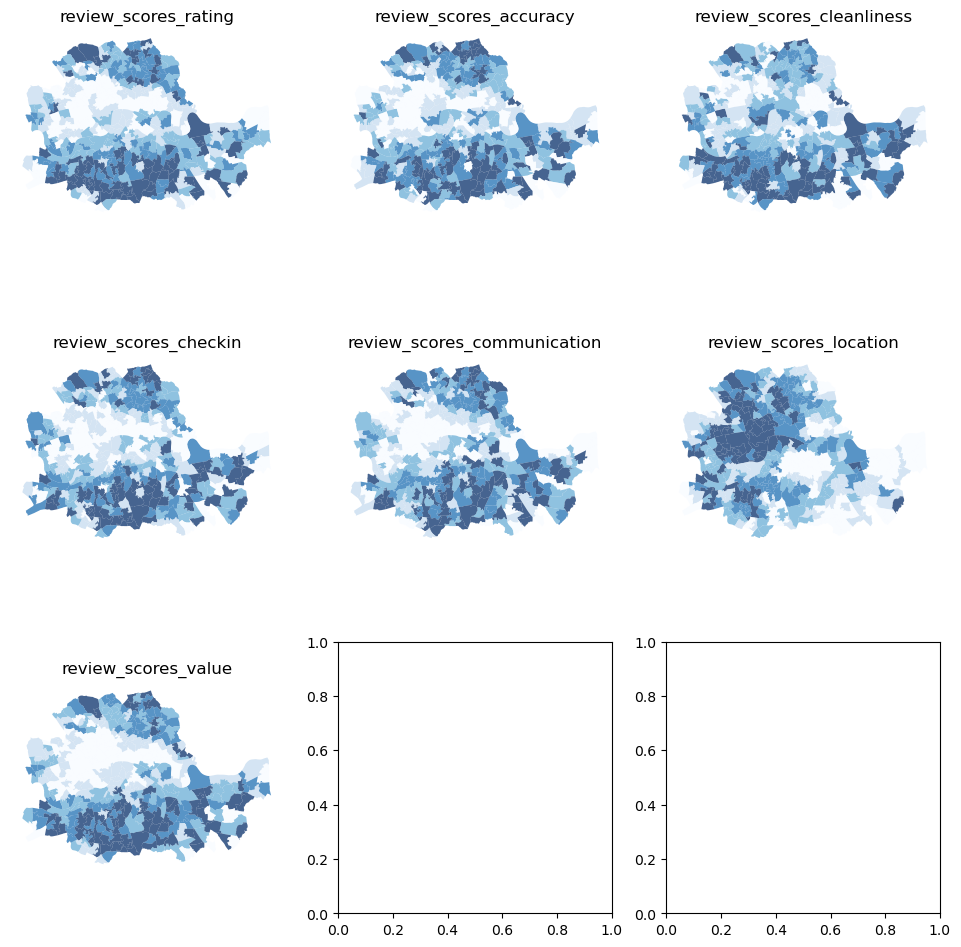

In [9]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(ratings):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    abb.plot(column=col, ax=ax, scheme="Quantiles", linewidth=0, cmap="Blues", alpha=0.75)
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()


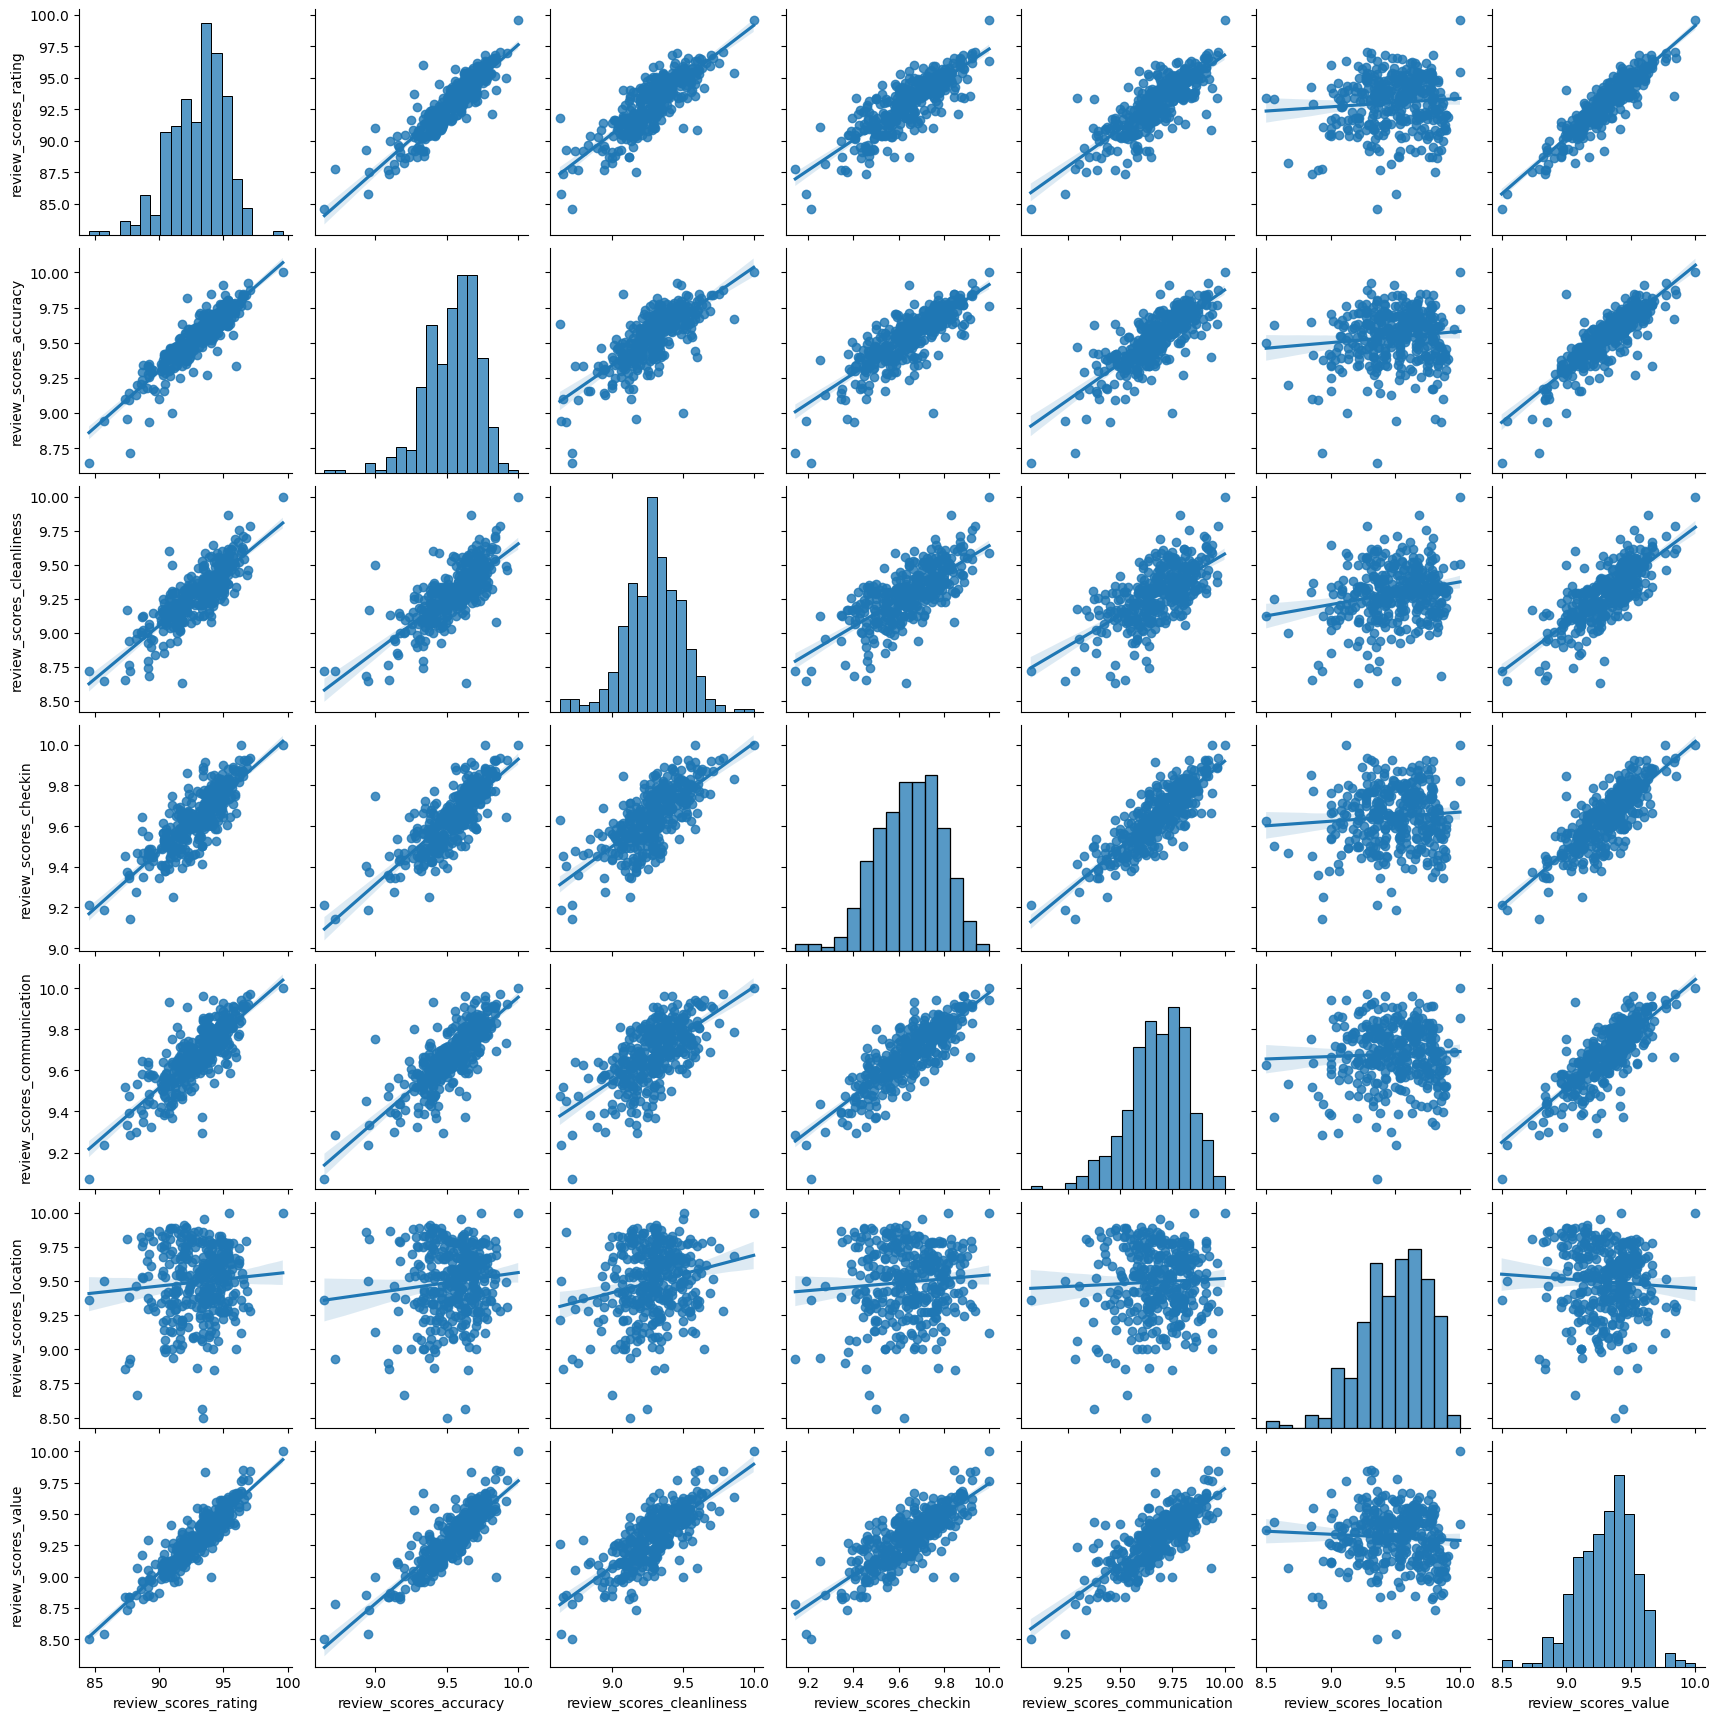

In [10]:
_ = sns.pairplot(abb[ratings], kind="reg", diag_kind="hist")


In [11]:
kmeans5 = cluster.KMeans(n_clusters=5, random_state=12345)


In [12]:
k5cls = kmeans5.fit(abb[ratings])

/Users/keithlowton/anaconda3/envs/Geospatial/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
k5cls.labels_

array([0, 2, 2, 2, 1, 1, 2, 3, 0, 3, 1, 3, 0, 3, 3, 3, 2, 1, 1, 0, 0, 0,
       4, 4, 4, 4, 4, 0, 0, 4, 0, 0, 3, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 3, 4, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 3, 3,
       3, 1, 1, 3, 1, 1, 3, 1, 1, 0, 1, 0, 3, 4, 0, 0, 3, 1, 1, 3, 0, 2,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       3, 0, 3, 3, 0, 1, 1, 3, 1, 3, 2, 1, 4, 3, 3, 0, 0, 4, 0, 0, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 3, 1, 3, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 3, 2, 0, 2, 2, 2, 2, 4, 1, 3, 2, 1, 2,
       2, 1, 4, 2, 2, 3, 1, 0, 1, 3, 1, 1, 3, 0, 3, 2, 0, 0, 3, 0, 0, 1,
       0, 3, 3, 1, 1, 1, 3, 1, 1, 3, 2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1,
       1, 3, 3, 0, 1, 3, 0, 4, 2, 0, 3, 4, 0, 4, 2, 0, 3, 0, 4, 0, 3, 0,
       0, 1, 3, 0, 4, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2,

In [14]:
abb['k5cls'] = k5cls.labels_

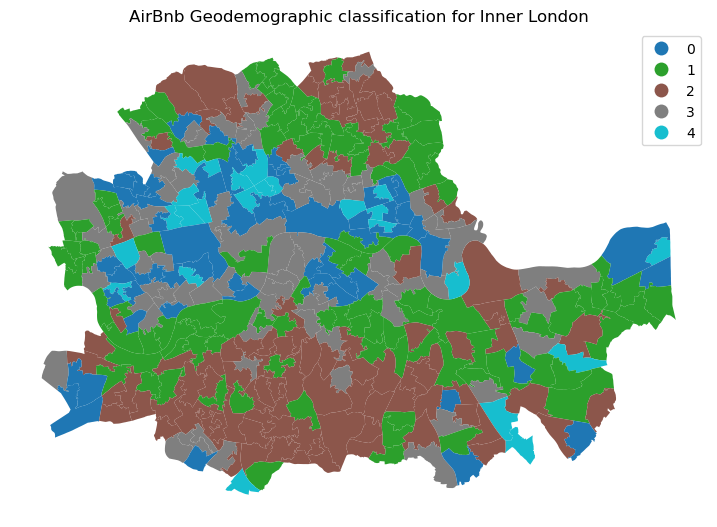

In [15]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
abb.plot(column="k5cls", categorical=True, legend=True, linewidth=0, ax=ax)
# Remove axis
ax.set_axis_off()
# Add title
plt.title("AirBnb Geodemographic classification for Inner London")
# Display the map
plt.show()


In [16]:
k5sizes = abb.groupby('k5cls').size()
k5sizes

k5cls
0     56
1    104
2     98
3     72
4     23
dtype: int64

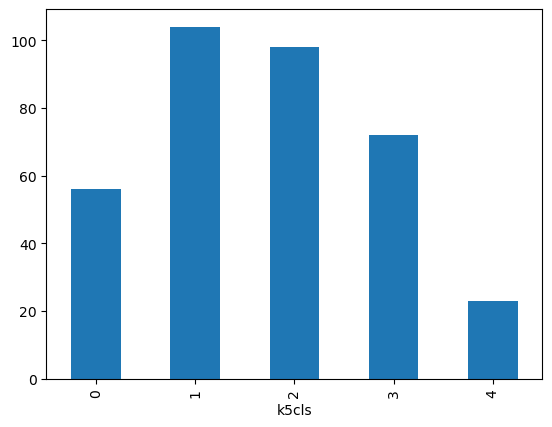

In [17]:
_ = k5sizes.plot.bar()

In [18]:
k5means = abb.groupby("k5cls")[ratings].mean()
# Show the table transposed (so it's not too wide)
k5means.T


k5cls,0,1,2,3,4
review_scores_rating,90.725593,93.727497,95.330624,92.134328,88.322160
review_scores_accuracy,9.355684,9.605591,9.717272,9.472732,9.149055
review_scores_cleanliness,9.132700,9.328059,9.478406,9.214409,8.907681
review_scores_checkin,9.510472,9.679087,9.785712,9.588242,9.413322
review_scores_communication,9.543217,9.722030,9.804255,9.627248,9.444095
review_scores_location,9.448517,9.443591,9.539375,9.546235,9.454598
review_scores_value,9.090933,9.384535,9.531206,9.220018,8.901364


In [22]:
w = lib.weights.Queen.from_dataframe(abb)

NameError: name 'lib' is not defined

In [20]:
sagg13 = cluster.AgglomerativeClustering(n_clusters=13, connectivity=w.sparse)
sagg13


NameError: name 'w' is not defined